## Generating a stacked bar chart where every row is a sample, showing the proportion of cells in each cell type, also coloured by cancer type/ site
* open obect in python and export dataframe with necessary info
* then using R for plotting as this will work better for visualising

In [ ]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#show current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [ ]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [ ]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [ ]:
data.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
Tissue resident macrophage           368421
Classical monocytes                   57086
non-classical monocytes               29255
cDC2                                  17391
KI-67+ Tissue resident macrophage     13020
cDC1                                   6730
mregDC                                 6120
Name: count, dtype: int64

In [ ]:
data.obs["MyeloidAPC_Subsets"].value_counts()

MyeloidAPC_Subsets
Tissue resident macrophage    381441
Classical monocytes            57086
non-classical monocytes        29255
cDC2                           17391
cDC1                            6730
mregDC                          6120
Name: count, dtype: int64

## Create dataframe per sample type, containing integration id, proportion of each DC subset, and cancer type

In [ ]:
#make an object for each sample type
data_P = data[data.obs["sample_type_major2"] == "primary tumour"]
data_M = data[data.obs["sample_type_major2"] == "metastatic tumour"]
data_H = data[data.obs["sample_type_major2"] == "healthy"]
data_A = data[data.obs["sample_type_major2"] == "ascites"]

### Primary:

In [ ]:
# Create a DataFrame containing just sample, cancer type and annotations 
df = data_P.obs[["integration_id", "cancer_broadest", "MyeloidAPC_Subsets"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["MyeloidAPC_Subsets"] == "cDC1"
df["is_cDC2"] = df["MyeloidAPC_Subsets"] == "cDC2"
df["is_mregDC"] = df["MyeloidAPC_Subsets"] == "mregDC"
df["is_mac"] = df["MyeloidAPC_Subsets"] == "Tissue resident macrophage"
df["is_c_mono"] = df["MyeloidAPC_Subsets"] == "Classical monocytes"
df["is_nc_mono"] = df["MyeloidAPC_Subsets"] == "non-classical monocytes"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC", "is_mac", "is_c_mono", "is_nc_mono"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion", "is_mac": "mac_proportion", "is_c_mono": "c_mono_proportion", "is_nc_mono": "nc_mono_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#delete rows with NaN values
proportion_df = proportion_df.dropna(subset=["cDC1_proportion"])

proportion_df.head(15)
proportion_df.to_csv("Full_Atlas_proportions_primary_2.csv", index=False)

/scratch/temp/14692606/ipykernel_953297/4037128478.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC", "is_mac", "is_c_mono", "is_nc_mono"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns


In [ ]:
proportion_df.head(15)

,integration_id,cancer_broadest,cDC1_proportion,cDC2_proportion,mregDC_proportion,mac_proportion,c_mono_proportion,nc_mono_proportion
3,GGSE223063_GLIO_1,GBM,0.007490,0.009814,0.002841,0.949122,0.024793,0.005940
15,GGSE223063_GLIO_2,GBM,0.000000,0.000000,0.000000,0.964623,0.033019,0.002358
27,GGSE223063_GLIO_3,GBM,0.001748,0.001748,0.000000,0.956294,0.032343,0.007867
40,GSE112271_HCC_Pt13,HCC,0.001845,0.004305,0.003075,0.964330,0.014145,0.012300
52,GSE112271_HCC_Pt14,HCC,0.010190,0.023893,0.009487,0.928320,0.017569,0.010541
69,GSE131907_LUAD_T0006,NSCLC,0.026570,0.137681,0.026570,0.685990,0.099034,0.024155
81,GSE131907_LUAD_T0008,NSCLC,0.021053,0.089474,0.057895,0.768421,0.057895,0.005263
93,GSE131907_LUAD_T0009,NSCLC,0.012687,0.032090,0.009701,0.836567,0.084328,0.024627
105,GSE131907_LUAD_T0018,NSCLC,0.007177,0.037081,0.008373,0.858852,0.076555,0.011962
117,GSE131907_LUAD_T0019,NSCLC,0.014955,0.064806,0.025922,0.731805,0.130608,0.031904


### Mets:

In [ ]:
# Create a DataFrame containing just sample, cancer type and annotations 
df = data_M.obs[["integration_id", "cancer_broadest", "MyeloidAPC_Subsets"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["MyeloidAPC_Subsets"] == "cDC1"
df["is_cDC2"] = df["MyeloidAPC_Subsets"] == "cDC2"
df["is_mregDC"] = df["MyeloidAPC_Subsets"] == "mregDC"
df["is_mac"] = df["MyeloidAPC_Subsets"] == "Tissue resident macrophage"
df["is_c_mono"] = df["MyeloidAPC_Subsets"] == "Classical monocytes"
df["is_nc_mono"] = df["MyeloidAPC_Subsets"] == "non-classical monocytes"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC", "is_mac", "is_c_mono", "is_nc_mono"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion", "is_mac": "mac_proportion", "is_c_mono": "c_mono_proportion", "is_nc_mono": "nc_mono_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#delete rows with NaN values
proportion_df = proportion_df.dropna(subset=["cDC1_proportion"])

proportion_df.head(15)
proportion_df.to_csv("Full_Atlas_proportions_mets_2.csv", index=False)

/scratch/temp/14692606/ipykernel_953297/931650283.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC", "is_mac", "is_c_mono", "is_nc_mono"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns


### Healthy:

In [ ]:
# Create a DataFrame containing just sample, cancer type and annotations 
df = data_H.obs[["integration_id", "site", "MyeloidAPC_Subsets"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["MyeloidAPC_Subsets"] == "cDC1"
df["is_cDC2"] = df["MyeloidAPC_Subsets"] == "cDC2"
df["is_mregDC"] = df["MyeloidAPC_Subsets"] == "mregDC"
df["is_mac"] = df["MyeloidAPC_Subsets"] == "Tissue resident macrophage"
df["is_c_mono"] = df["MyeloidAPC_Subsets"] == "Classical monocytes"
df["is_nc_mono"] = df["MyeloidAPC_Subsets"] == "non-classical monocytes"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "site"])[["is_cDC1", "is_cDC2", "is_mregDC", "is_mac", "is_c_mono", "is_nc_mono"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion", "is_mac": "mac_proportion", "is_c_mono": "c_mono_proportion", "is_nc_mono": "nc_mono_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#delete rows with NaN values
proportion_df = proportion_df.dropna(subset=["cDC1_proportion"])

proportion_df.head(15)
proportion_df.to_csv("Full_Atlas_proportions_healthy_2.csv", index=False)

/scratch/temp/14692606/ipykernel_953297/4167633974.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["integration_id", "site"])[["is_cDC1", "is_cDC2", "is_mregDC", "is_mac", "is_c_mono", "is_nc_mono"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns


### Ascites:

In [ ]:
# Create a DataFrame containing just sample, cancer type and annotations 
df = data_A.obs[["integration_id", "cancer_broadest", "MyeloidAPC_Subsets"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["MyeloidAPC_Subsets"] == "cDC1"
df["is_cDC2"] = df["MyeloidAPC_Subsets"] == "cDC2"
df["is_mregDC"] = df["MyeloidAPC_Subsets"] == "mregDC"
df["is_mac"] = df["MyeloidAPC_Subsets"] == "Tissue resident macrophage"
df["is_c_mono"] = df["MyeloidAPC_Subsets"] == "Classical monocytes"
df["is_nc_mono"] = df["MyeloidAPC_Subsets"] == "non-classical monocytes"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC", "is_mac", "is_c_mono", "is_nc_mono"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion", "is_mac": "mac_proportion", "is_c_mono": "c_mono_proportion", "is_nc_mono": "nc_mono_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#delete rows with NaN values
proportion_df = proportion_df.dropna(subset=["cDC1_proportion"])

proportion_df.head(15)
proportion_df.to_csv("Full_Atlas_proportions_ascites_2.csv", index=False)

/scratch/temp/14692606/ipykernel_953297/592920703.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC", "is_mac", "is_c_mono", "is_nc_mono"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns


# Next section in R: generating figure

In [1]:
# set directory
setwd('/scratch/user/s4436039/scdata/Myeloid_Objects')

In [2]:
#load data
df_P <- read.csv("Full_Atlas_proportions_primary_2.csv", row.names =1)
df_M <- read.csv("Full_Atlas_proportions_mets_2.csv", row.names =1)
df_H <- read.csv("Full_Atlas_proportions_healthy_2.csv", row.names =1)
df_A <- read.csv("Full_Atlas_proportions_ascites_2.csv", row.names =1)

In [3]:
# change lymph node to LN for plotting
df_H$site[df_H$site == "lymph node"] <- "LN"

In [4]:
library(ggplot2)
library(ggh4x)
library(tidyr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
# convert data to long format
df_P <- df_P %>%
  tibble::rownames_to_column("integration_id") %>%  
  pivot_longer(
    cols = c(cDC1_proportion, cDC2_proportion, mregDC_proportion, mac_proportion, c_mono_proportion, nc_mono_proportion),
    names_to = "Cell_subset",
    values_to = "proportion"
  )

df_M <- df_M %>%
  tibble::rownames_to_column("integration_id") %>%  
  pivot_longer(
    cols = c(cDC1_proportion, cDC2_proportion, mregDC_proportion, mac_proportion, c_mono_proportion, nc_mono_proportion),
    names_to = "Cell_subset",
    values_to = "proportion"
  )

df_H <- df_H %>%
  tibble::rownames_to_column("integration_id") %>%  
  pivot_longer(
    cols = c(cDC1_proportion, cDC2_proportion, mregDC_proportion, mac_proportion, c_mono_proportion, nc_mono_proportion),
    names_to = "Cell_subset",
    values_to = "proportion"
  )

df_A <- df_A %>%
  tibble::rownames_to_column("integration_id") %>%  
  pivot_longer(
    cols = c(cDC1_proportion, cDC2_proportion, mregDC_proportion, mac_proportion, c_mono_proportion, nc_mono_proportion),
    names_to = "Cell_subset",
    values_to = "proportion"
  )

In [6]:
head(df_P)

integration_id,cancer_broadest,Cell_subset,proportion
<chr>,<chr>,<chr>,<dbl>
GGSE223063_GLIO_1,GBM,cDC1_proportion,0.007489669
GGSE223063_GLIO_1,GBM,cDC2_proportion,0.009814050
GGSE223063_GLIO_1,GBM,mregDC_proportion,0.002840909
GGSE223063_GLIO_1,GBM,mac_proportion,0.949121901
GGSE223063_GLIO_1,GBM,c_mono_proportion,0.024793388
GGSE223063_GLIO_1,GBM,nc_mono_proportion,0.005940083


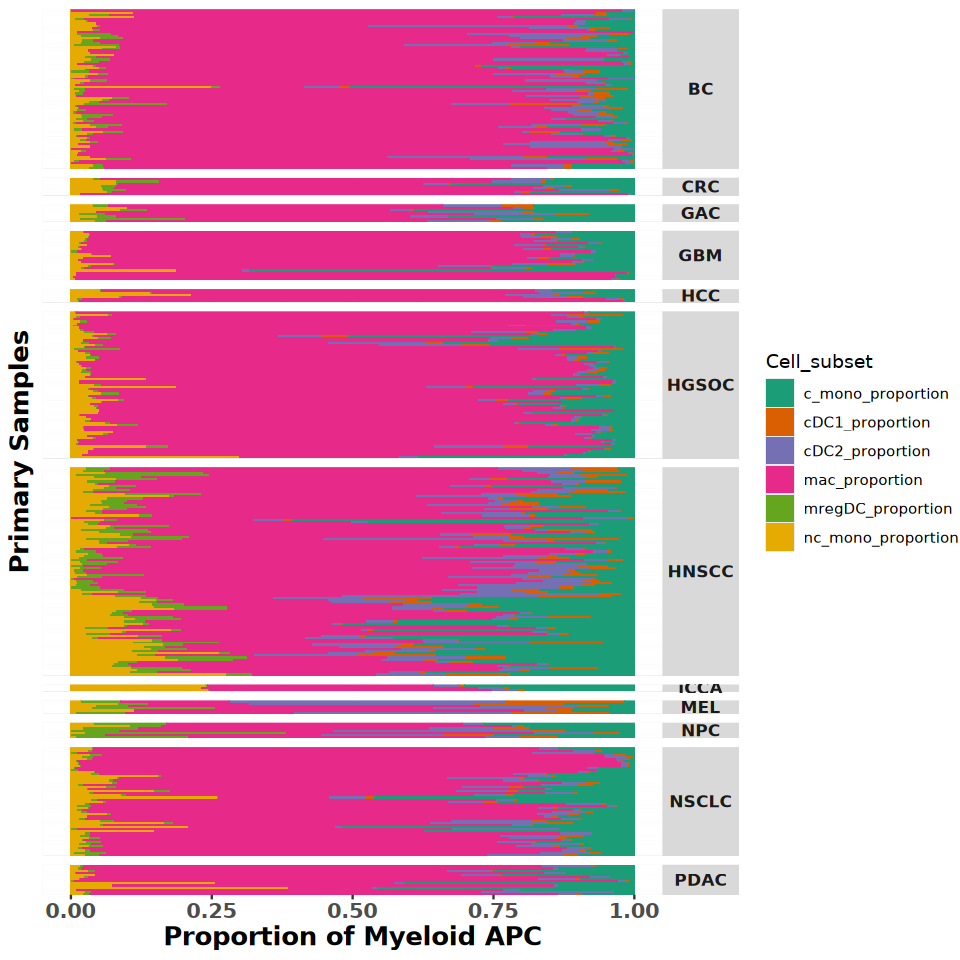

In [7]:
# plot once to show legend
options(repr.plot.height=8, repr.plot.width=8)
ggplot(df_P, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Primary Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10)) +
  scale_fill_brewer(palette="Dark2")

#ggsave("dc_proportions_legend.svg", width = 8, height = 8, units = "in")

### Updating with new colours (originally had everything as "Dark2" like example above)

In [8]:
# Set custom stack order
df_P$Cell_subset <- factor(df_P$Cell_subset, levels = c(
  "cDC1_proportion",
  "cDC2_proportion",
  "mregDC_proportion",
  "mac_proportion",
  "c_mono_proportion",
  "nc_mono_proportion"
))

df_M$Cell_subset <- factor(df_M$Cell_subset, levels = c(
  "cDC1_proportion",
  "cDC2_proportion",
  "mregDC_proportion",
  "mac_proportion",
  "c_mono_proportion",
  "nc_mono_proportion"
))

df_H$Cell_subset <- factor(df_H$Cell_subset, levels = c(
  "cDC1_proportion",
  "cDC2_proportion",
  "mregDC_proportion",
  "mac_proportion",
  "c_mono_proportion",
  "nc_mono_proportion"
))

df_A$Cell_subset <- factor(df_A$Cell_subset, levels = c(
  "cDC1_proportion",
  "cDC2_proportion",
  "mregDC_proportion",
  "mac_proportion",
  "c_mono_proportion",
  "nc_mono_proportion"
))

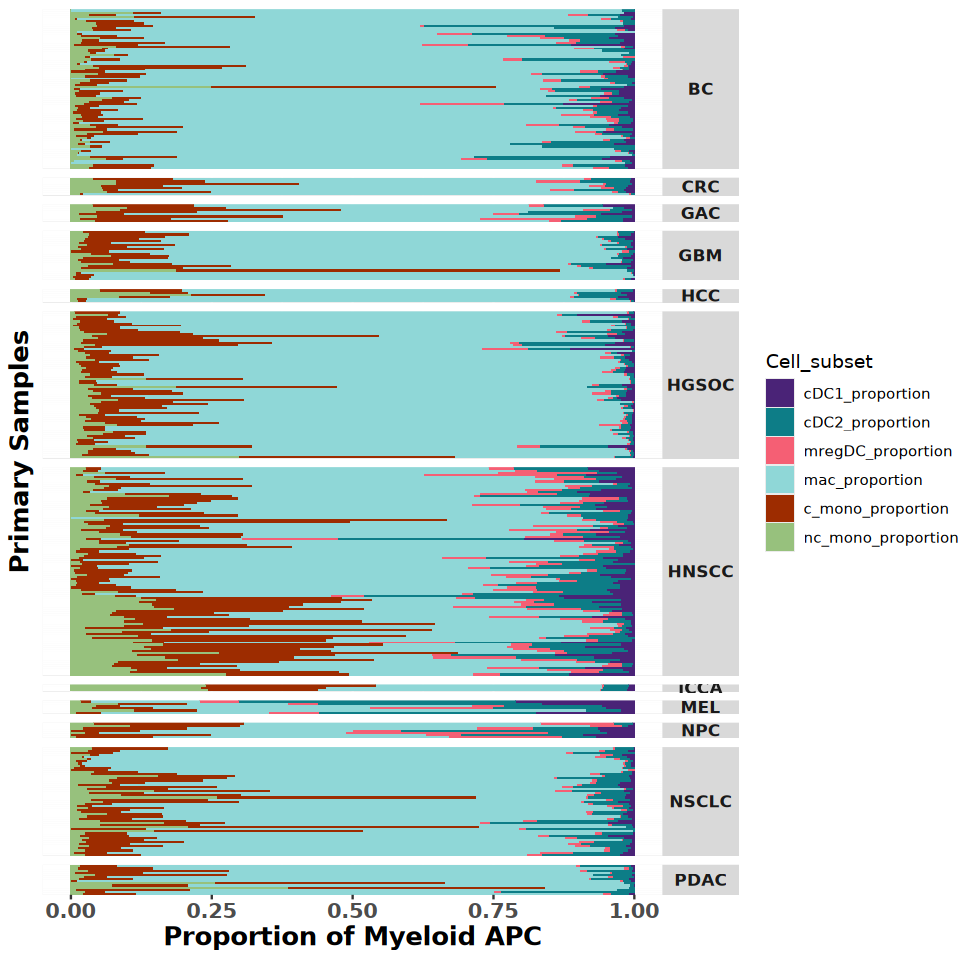

In [11]:
# plot once to show legend
options(repr.plot.height=8, repr.plot.width=8)
ggplot(df_P, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Primary Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10)) +
  scale_fill_manual(values = c("cDC1_proportion" = "#4a2377","cDC2_proportion" = "#0d7d87","mregDC_proportion" = "#f55f74", "mac_proportion" = "#8fd7d7", "c_mono_proportion" = "#9d2c00", "nc_mono_proportion" = "#97c17d"))

ggsave("AllCells_proportions_legend_2.svg", width = 8, height = 8, units = "in")

In [10]:
library(svglite)

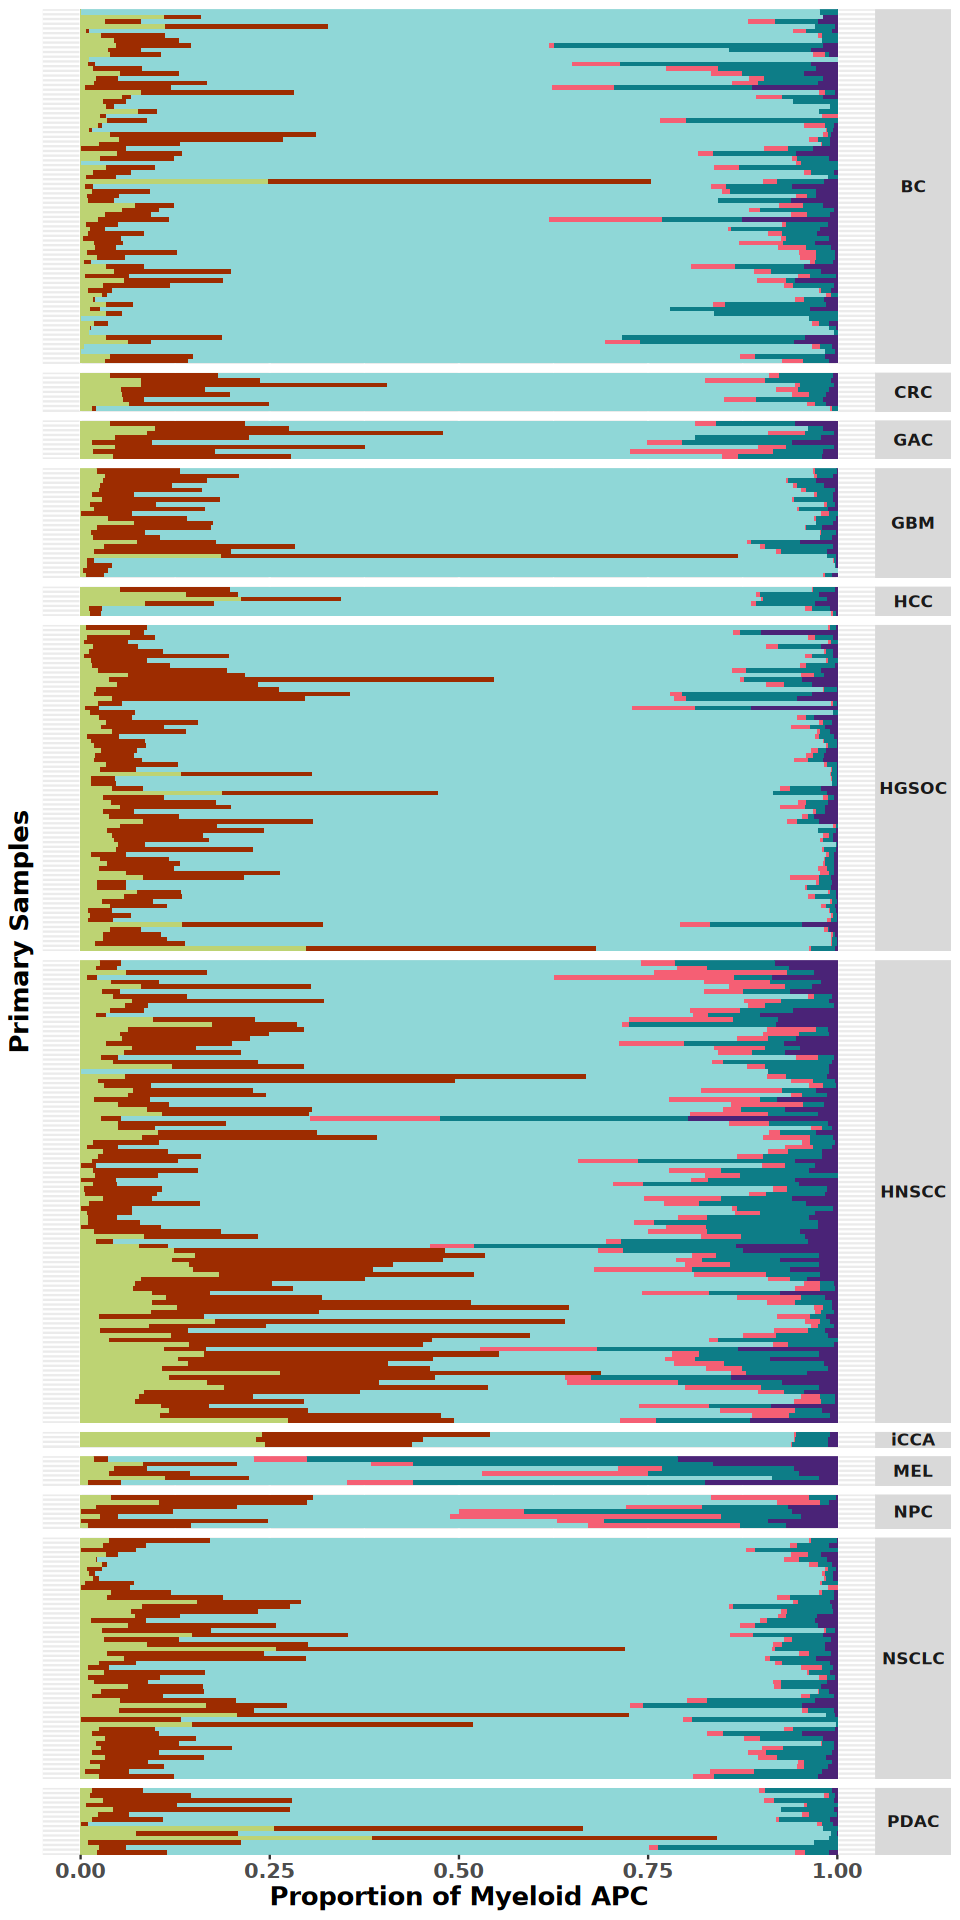

In [12]:
options(repr.plot.height=16, repr.plot.width=8)
ggplot(df_P, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Primary Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#4a2377","cDC2_proportion" = "#0d7d87","mregDC_proportion" = "#f55f74", "mac_proportion" = "#8fd7d7", "c_mono_proportion" = "#9d2c00", "nc_mono_proportion" = "#bdd373"))

  ggsave("AllCells_proportions_primary_2.svg", width = 8, height = 16, units = "in")

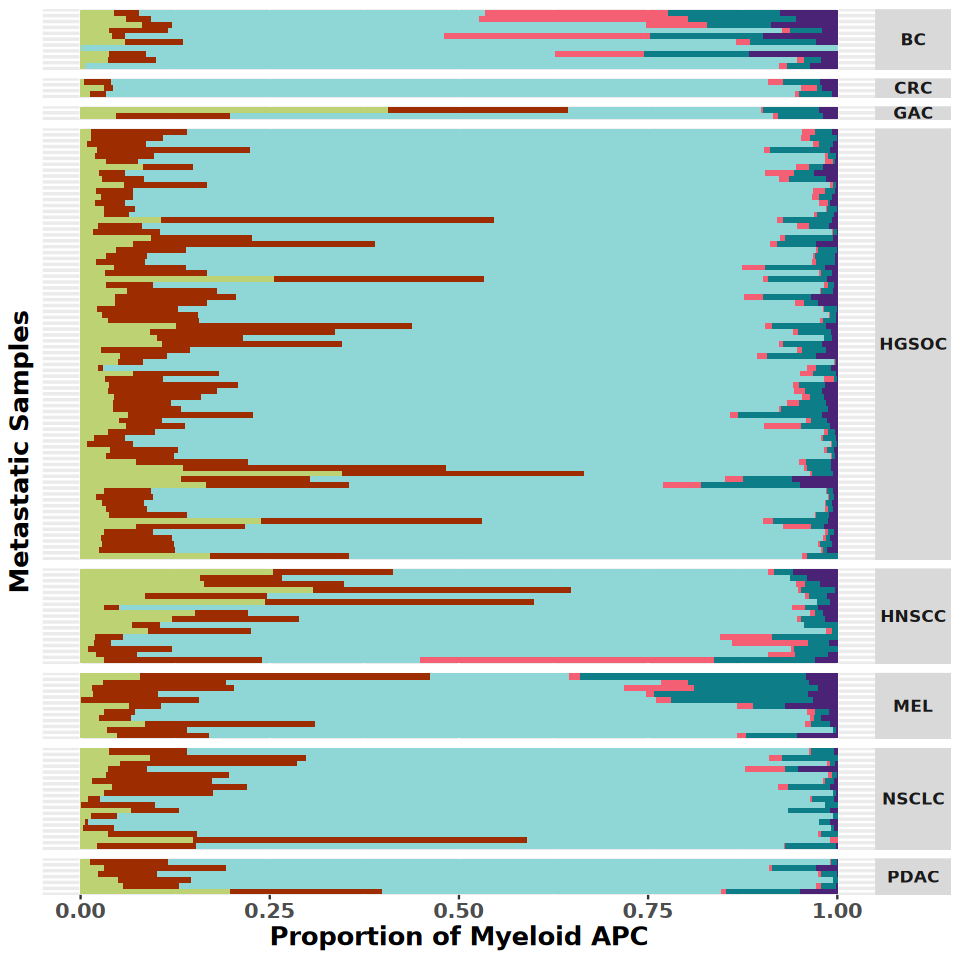

In [13]:
options(repr.plot.height=8, repr.plot.width=8)
ggplot(df_M, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Metastatic Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#4a2377","cDC2_proportion" = "#0d7d87","mregDC_proportion" = "#f55f74", "mac_proportion" = "#8fd7d7", "c_mono_proportion" = "#9d2c00", "nc_mono_proportion" = "#bdd373"))

ggsave("AllCells_proportions_mets_2.svg", width = 8, height = 8, units = "in")

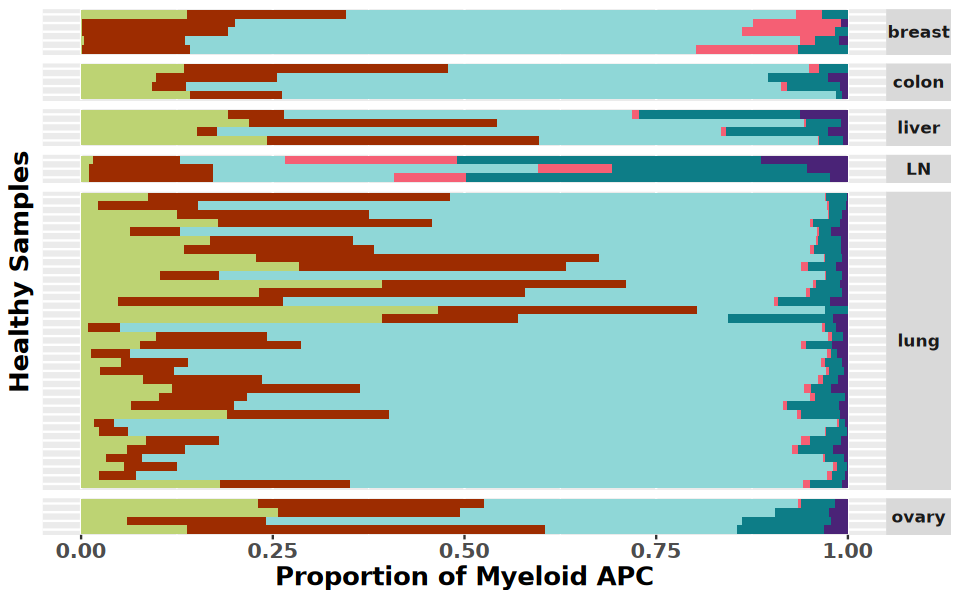

In [14]:
options(repr.plot.height=5, repr.plot.width=8)
ggplot(df_H, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(site ~ ., scales = "free_y", space = "free") +
  ylab("Healthy Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#4a2377","cDC2_proportion" = "#0d7d87","mregDC_proportion" = "#f55f74", "mac_proportion" = "#8fd7d7", "c_mono_proportion" = "#9d2c00", "nc_mono_proportion" = "#bdd373"))

ggsave("AllCells_proportions_healthy_2.svg", width = 8, height = 5, units = "in")

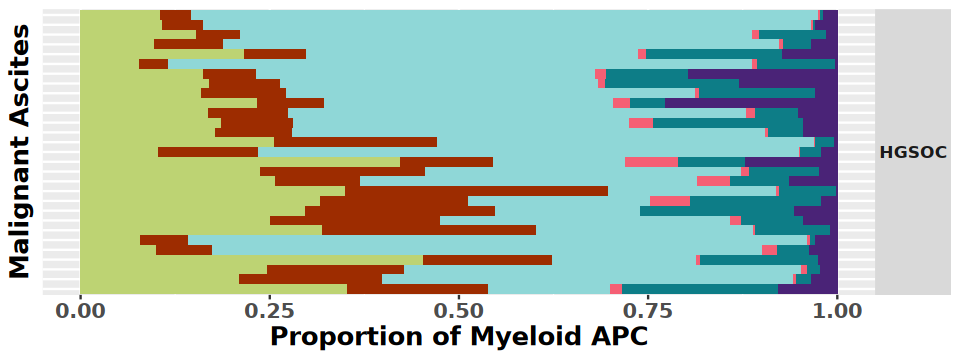

In [15]:
options(repr.plot.height=3, repr.plot.width=8)
ggplot(df_A, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Malignant Ascites") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#4a2377","cDC2_proportion" = "#0d7d87","mregDC_proportion" = "#f55f74", "mac_proportion" = "#8fd7d7", "c_mono_proportion" = "#9d2c00", "nc_mono_proportion" = "#bdd373"))

ggsave("AllCells_proportions_ascites_2.svg", width = 8, height = 3, units = "in")

## Changing colours to match other manuscript figures
* Colours are: 
* #d62728 - cMono
* #279e68 - Mac
* #e377c2 - cDC1
* #aa40fc - cDC2
* #8c564b - mregDC
* #5fa6e6 - ncMono

"cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b", "mac_proportion" = "#279e68", "c_mono_proportion" = "#d62728", "nc_mono_proportion" = "#5fa6e6"

In [7]:
# Set custom stack order
df_P$Cell_subset <- factor(df_P$Cell_subset, levels = c(
  "cDC1_proportion",
  "cDC2_proportion",
  "mregDC_proportion",
  "mac_proportion",
  "c_mono_proportion",
  "nc_mono_proportion"
))

df_M$Cell_subset <- factor(df_M$Cell_subset, levels = c(
  "cDC1_proportion",
  "cDC2_proportion",
  "mregDC_proportion",
  "mac_proportion",
  "c_mono_proportion",
  "nc_mono_proportion"
))

df_H$Cell_subset <- factor(df_H$Cell_subset, levels = c(
  "cDC1_proportion",
  "cDC2_proportion",
  "mregDC_proportion",
  "mac_proportion",
  "c_mono_proportion",
  "nc_mono_proportion"
))

df_A$Cell_subset <- factor(df_A$Cell_subset, levels = c(
  "cDC1_proportion",
  "cDC2_proportion",
  "mregDC_proportion",
  "mac_proportion",
  "c_mono_proportion",
  "nc_mono_proportion"
))

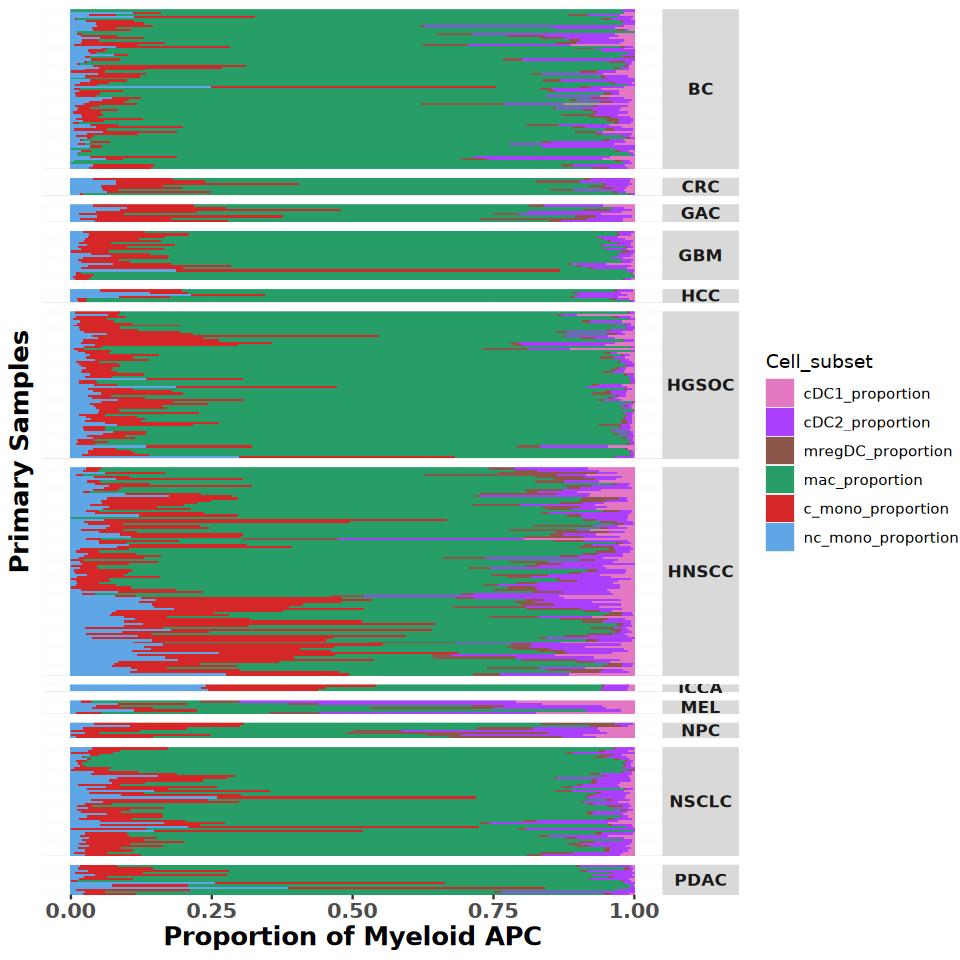

In [16]:
# plot once to show legend
options(repr.plot.height=8, repr.plot.width=8)
ggplot(df_P, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Primary Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10)) +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b", "mac_proportion" = "#279e68", "c_mono_proportion" = "#d62728", "nc_mono_proportion" = "#5fa6e6"))

ggsave("AllCells_proportions_legend_3.pdf", width = 8, height = 8, units = "in")

In [18]:
library(svglite)

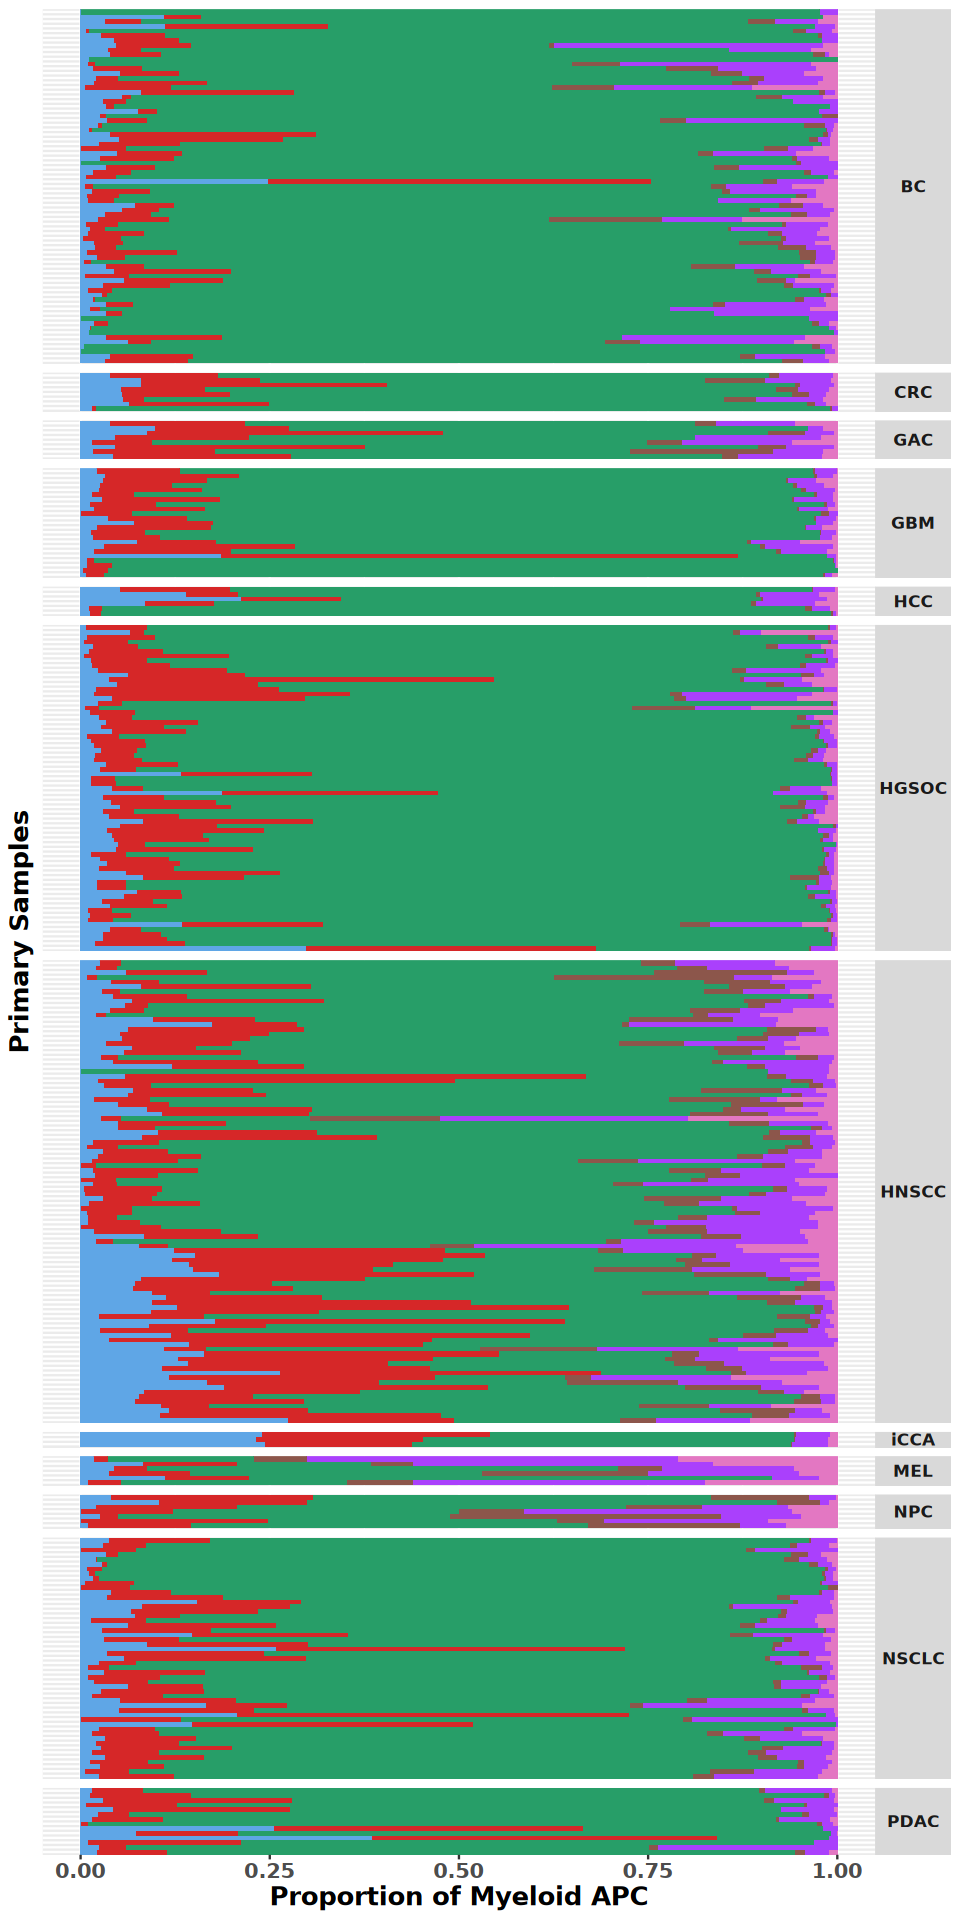

In [17]:
options(repr.plot.height=16, repr.plot.width=8)
ggplot(df_P, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Primary Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b", "mac_proportion" = "#279e68", "c_mono_proportion" = "#d62728", "nc_mono_proportion" = "#5fa6e6"))

  ggsave("AllCells_proportions_primary_3.pdf", width = 8, height = 16, units = "in")

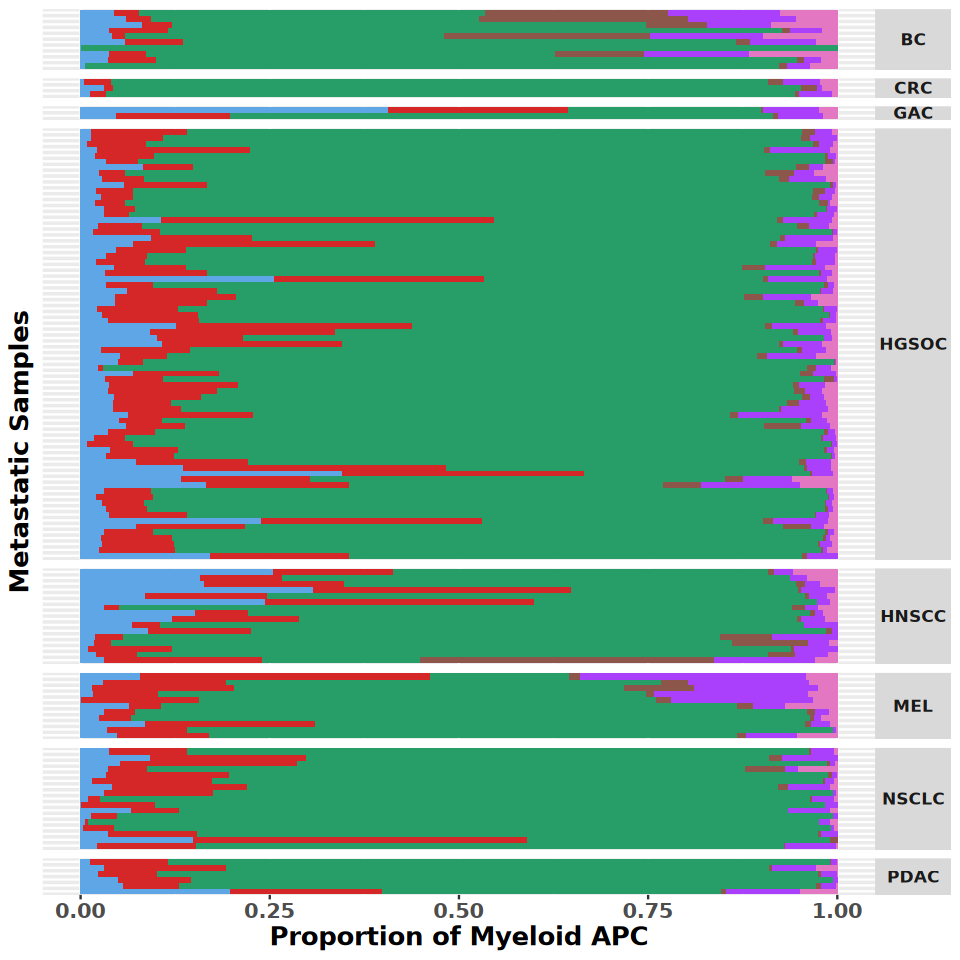

In [19]:
options(repr.plot.height=8, repr.plot.width=8)
ggplot(df_M, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Metastatic Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b", "mac_proportion" = "#279e68", "c_mono_proportion" = "#d62728", "nc_mono_proportion" = "#5fa6e6"))

ggsave("AllCells_proportions_mets_3.pdf", width = 8, height = 8, units = "in")

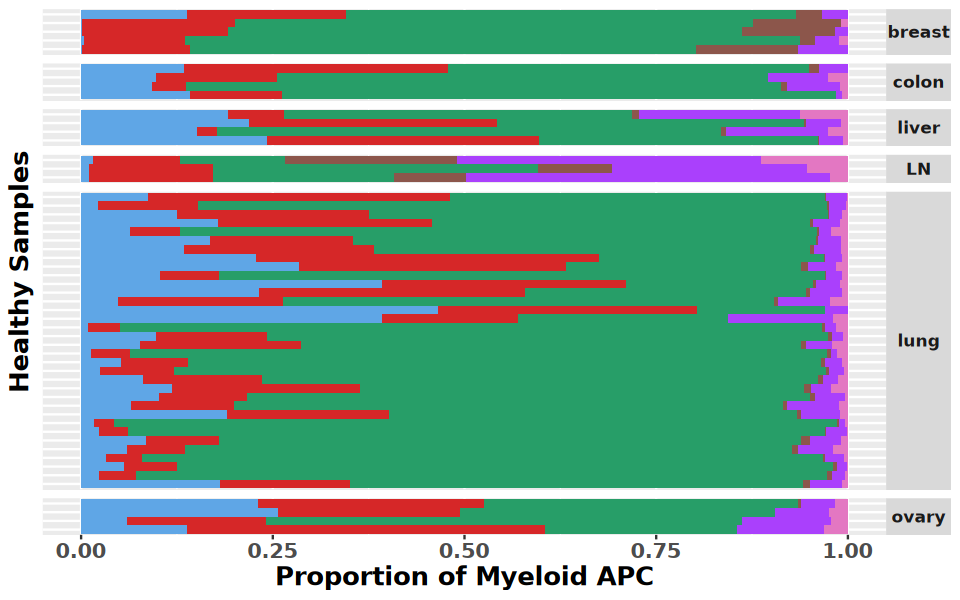

In [20]:
options(repr.plot.height=5, repr.plot.width=8)
ggplot(df_H, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(site ~ ., scales = "free_y", space = "free") +
  ylab("Healthy Samples") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b", "mac_proportion" = "#279e68", "c_mono_proportion" = "#d62728", "nc_mono_proportion" = "#5fa6e6"))

ggsave("AllCells_proportions_healthy_3.pdf", width = 8, height = 5, units = "in")

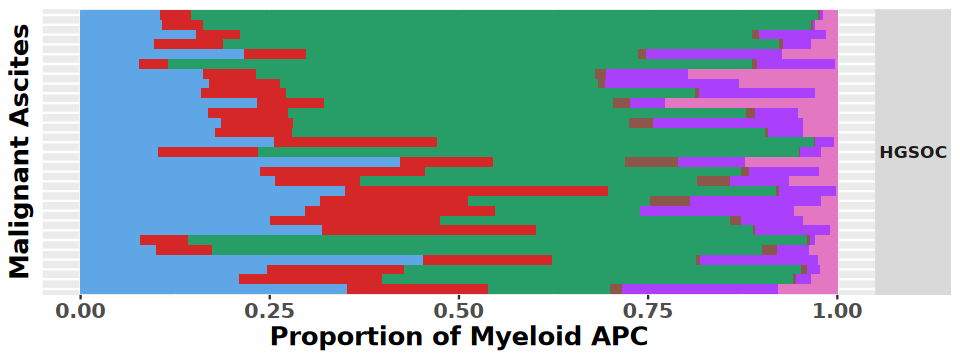

In [21]:
options(repr.plot.height=3, repr.plot.width=8)
ggplot(df_A, aes(fill = Cell_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Malignant Ascites") +
  xlab("Proportion of Myeloid APC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b", "mac_proportion" = "#279e68", "c_mono_proportion" = "#d62728", "nc_mono_proportion" = "#5fa6e6"))

ggsave("AllCells_proportions_ascites_3.pdf", width = 8, height = 3, units = "in")